# Visualisations and Summary Stats

# 1. Setup

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib
from arch import arch_model
from arch.unitroot import ADF, PhillipsPerron
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import datetime
import time

In [96]:
file_path= "/Users/robinvandenberg/Desktop/Desktop – Robin’s MacBook Pro/Thesis/Data/main_new.xlsx"
main = pd.read_excel(file_path)
main = main.set_index(main['time'])
main = main.drop(['Unnamed: 0', 'time'], axis=1) #remove unnecessary index column
main

,Spot Close,Spot Volume,CQF Close,CQF Volume,NQF Close,NQF Volume,diff
time,,,,,,,
2019-07-21 13:00:00,10542.000000,1.052900,10656.500000,0.000000,0.000000,0.000000,-10656.500000
2019-07-21 13:15:00,10584.000000,0.000000,10701.500000,0.000000,0.000000,0.000000,-10701.500000
2019-07-21 13:30:00,10568.000000,0.000000,10686.000000,0.000000,0.000000,0.000000,-10686.000000
2019-07-21 13:45:00,10535.500000,0.000000,10648.000000,0.000000,0.000000,0.000000,-10648.000000
2019-07-21 14:00:00,10531.000000,0.000000,10637.250000,0.000000,0.000000,0.000000,-10637.250000
...,...,...,...,...,...,...,...
2022-04-30 21:00:00,38278.000000,6148996.748600,38380.000000,479102.952100,38690.000000,121668.048000,310.000000
2022-04-30 21:15:00,38325.000000,4012060.058300,38431.000000,94022.478300,38753.000000,5289.784500,322.000000
2022-04-30 21:30:00,38355.000000,3339375.443900,38460.000000,41562.171500,38779.000000,976.327400,319.000000


In [97]:
# Both volume columns have zero values. So we need the minimum non-zero values. 
non_zero_cqf_vol = []
for i in range(0, len(main['CQF Volume'])):
    if main['CQF Volume'][i] != 0:
        non_zero_cqf_vol.append(main['CQF Volume'][i])

non_zero_spot_vol = []
for i in range(0, len(main['Spot Volume'])):
    if main['Spot Volume'][i] != 0:
        non_zero_spot_vol.append(main['Spot Volume'][i])

non_zero_nqf_vol = []
for i in range(0, len(main['NQF Volume'])):
    if main['NQF Volume'][i] != 0:
        non_zero_nqf_vol.append(main['NQF Volume'][i])

min(non_zero_cqf_vol), min(non_zero_spot_vol), min(non_zero_nqf_vol)

(0.6133, 0.7171, 0.6171)

In [98]:
main = main[datetime.datetime(2021, 6, 30, 0, 0):datetime.datetime(2022, 1, 1, 0, 0)].copy()

# Define the log current quarter future price
main['log_price'] = np.log(main['CQF Close'])
# Define the log returns for the current quarter future price
main['CQF Returns'] = np.log(main['CQF Close']).diff()
# Define the lagged log returns for the current quarter future price
main['lag_returns'] = main['CQF Returns'].shift(1)

# Define the log volume for the current quarter future
main['cqf_log_vol'] = np.log(main['CQF Volume'] + min(non_zero_cqf_vol))
# Define the change in volume for the current quarter future
main['Δ CQF Volume'] = main['cqf_log_vol'].diff()
# Define the lagged change in log volume for the current quarter future
main['lag_change_cqf_vol'] = main['Δ CQF Volume'].shift(1)

# Define the log next quarter future price
main['log_nqf_price'] = np.log(main['NQF Close'])
# Define the log returns for the next quarter future price
main['NQF Returns'] = np.log(main['NQF Close']).diff()
# Define the lagged log returns for the next quarter future price
main['lag_nqf_returns'] = main['NQF Returns'].shift(1)

# Define the log volume for the next quarter future
main['nqf_log_vol'] = np.log(main['NQF Volume'] + min(non_zero_nqf_vol))
# Define the change in volume for the next quarter future
main['Δ NQF Volume'] = main['nqf_log_vol'].diff()
# Define the lagged change in log volume for the next quarter future
main['lag_change_nqf_vol'] = main['Δ NQF Volume'].shift(1)

# Define the log current quarter future price
main['log_spot_price'] = np.log(main['Spot Close'])
# Define the log returns for the current quarter future price
main['Spot Returns'] = np.log(main['Spot Close']).diff()
# Define the lagged log returns for the current quarter future price
main['lag_spot_returns'] = main['Spot Returns'].shift(1)

# Define the log volume for the spot
main['spot_log_vol'] = np.log(main['Spot Volume'] + min(non_zero_spot_vol))
# Define the change in volume for the spot
main['Δ Spot Volume'] = main['spot_log_vol'].diff()
# Define the lagged change in log volume for the spot
main['lag_change_spot_vol'] = main['Δ Spot Volume'].shift(1)

main = main[datetime.datetime(2021, 7, 1, 0, 0):datetime.datetime(2022, 1, 1, 0, 0)]
main = main.reset_index()
main

,time,Spot Close,Spot Volume,CQF Close,CQF Volume,NQF Close,NQF Volume,diff,log_price,CQF Returns,...,lag_nqf_returns,nqf_log_vol,Δ NQF Volume,lag_change_nqf_vol,log_spot_price,Spot Returns,lag_spot_returns,spot_log_vol,Δ Spot Volume,lag_change_spot_vol
0,2021-07-01 00:00:00,34839.000000,5199492.786000,35444.000000,1215913.004500,36132.000000,228026.478400,688.000000,10.475709,-0.006552,...,-0.001512,12.337220,0.696390,0.443352,10.458493,-0.006209,-0.001397,15.464072,0.220842,-0.139949
1,2021-07-01 00:15:00,34799.000000,3870319.226300,35421.000000,1409117.340800,36094.000000,1309984.337900,673.000000,10.475060,-0.000649,...,-0.005878,14.085526,1.748306,0.696390,10.457344,-0.001149,-0.006209,15.168848,-0.295224,0.220842
2,2021-07-01 00:30:00,34770.000000,1793630.000600,35359.000000,738625.644800,36036.000000,35387.297700,677.000000,10.473308,-0.001752,...,-0.001052,10.474126,-3.611401,1.748306,10.456510,-0.000834,-0.001149,14.399752,-0.769095,-0.295224
3,2021-07-01 00:45:00,34737.000000,1605400.727400,35333.000000,424856.572600,36010.000000,18755.103400,677.000000,10.472573,-0.000736,...,-0.001608,9.839254,-0.634872,-3.611401,10.455561,-0.000950,-0.000834,14.288884,-0.110868,-0.769095
4,2021-07-01 01:00:00,34818.000000,1969387.157900,35421.000000,443461.478900,36090.000000,45800.320300,669.000000,10.475060,0.002487,...,-0.000722,10.732060,0.892806,-0.634872,10.457890,0.002329,-0.000950,14.493233,0.204349,-0.110868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17660,2021-12-31 23:00:00,46428.000000,1703139.617300,47368.000000,1586353.676800,48624.000000,368141.202100,1256.000000,10.765702,0.002515,...,0.000804,12.816224,-1.203518,0.269117,10.745658,0.002480,0.000475,14.347984,-0.568456,0.988305
17661,2021-12-31 23:15:00,46359.000000,1285161.613900,47298.000000,883860.183300,48532.000000,399343.475800,1234.000000,10.764223,-0.001479,...,0.002079,12.897579,0.081355,-1.203518,10.744171,-0.001487,0.002480,14.066396,-0.281589,-0.568456
17662,2021-12-31 23:30:00,46462.000000,1794593.839300,47402.000000,1699349.545500,48719.000000,1353782.907400,1317.000000,10.766420,0.002196,...,-0.001894,14.118414,1.220835,0.081355,10.746390,0.002219,-0.001487,14.400290,0.333894,-0.281589
17663,2021-12-31 23:45:00,46199.000000,3233098.830700,47157.000000,933979.502500,48443.000000,610169.870600,1286.000000,10.761238,-0.005182,...,0.003846,13.321494,-0.796920,1.220835,10.740713,-0.005677,0.002219,14.988952,0.588662,0.333894


# 2. Summary Stats

In [99]:
pd.options.display.float_format = '{:.2f}'.format

summary_1 = main.agg(
     {
         "CQF Close": ["mean", "median", "min", "max", "std", "skew", "kurt", "size"],
         "CQF Volume": ["mean", "median", "min", "max", "std", "skew", "kurt", "size"],  
         
         "NQF Close": ["mean", "median", "min", "max", "std", "skew", "kurt", "size"],
         "NQF Volume": ["mean", "median", "min", "max", "std", "skew", "kurt", "size"],   
         
         "Spot Close": ["mean", "median", "min", "max", "std", "skew", "kurt", "size"],
         "Spot Volume": ["mean", "median", "min", "max", "std", "skew", "kurt", "size"]
     }
 )

with open('/Users/robinvandenberg/Desktop/Desktop – Robin’s MacBook Pro/Thesis/Scripts/Tables/summary_1.tex','w') as tf:
    tf.write(summary_1.to_latex())

summary_1.to_excel('/Users/robinvandenberg/Desktop/Desktop – Robin’s MacBook Pro/Thesis/Scripts/Tables/summary_1.xlsx')
summary_1

pd.options.display.float_format = '{:.6f}'.format

summary_2 = main.agg(
     {
         "CQF Returns": ["mean", "median", "min", "max", "std", "skew", "kurt", "size"],
         "Δ CQF Volume": ["mean", "median", "min", "max", "std", "skew", "kurt", "size"],      
         
         "NQF Returns": ["mean", "median", "min", "max", "std", "skew", "kurt", "size"],
         "Δ NQF Volume": ["mean", "median", "min", "max", "std", "skew", "kurt", "size"],          
         
         "Spot Returns": ["mean", "median", "min", "max", "std", "skew", "kurt", "size"],
         "Δ Spot Volume": ["mean", "median", "min", "max", "std", "skew", "kurt", "size"]
     }
 )

with open('/Users/robinvandenberg/Desktop/Desktop – Robin’s MacBook Pro/Thesis/Scripts/Tables/summary_2.tex','w') as tf:
    tf.write(summary_2.to_latex())

summary_2.to_excel('/Users/robinvandenberg/Desktop/Desktop – Robin’s MacBook Pro/Thesis/Scripts/Tables/summary_2.xlsx')
summary_2

/var/folders/tv/yf2rtv1j16z862b1fzdggrth0000gn/T/ipykernel_66497/3256729798.py:17: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(summary_1.to_latex())
/var/folders/tv/yf2rtv1j16z862b1fzdggrth0000gn/T/ipykernel_66497/3256729798.py:38: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(summary_2.to_latex())


,CQF Returns,Δ CQF Volume,NQF Returns,Δ NQF Volume,Spot Returns,Δ Spot Volume
mean,0.000016,-0.000009,0.000016,0.000105,0.000016,0.000003
median,-0.000029,-0.036872,-0.000018,-0.022483,-0.000016,-0.029108
min,-0.080768,-14.695613,-0.084204,-15.391265,-0.065191,-12.285352
max,0.036618,15.965285,0.038580,13.987488,0.035703,16.007252
std,0.003739,0.904030,0.003864,1.886154,0.003583,0.675884
skew,-0.494347,0.315657,-0.641105,-0.007188,-0.352797,0.695301
kurt,23.419552,10.181243,26.095204,11.064840,18.331609,24.583934
size,17665.000000,17665.000000,17665.000000,17665.000000,17665.000000,17665.000000


# 3. Visualisations

# Prices

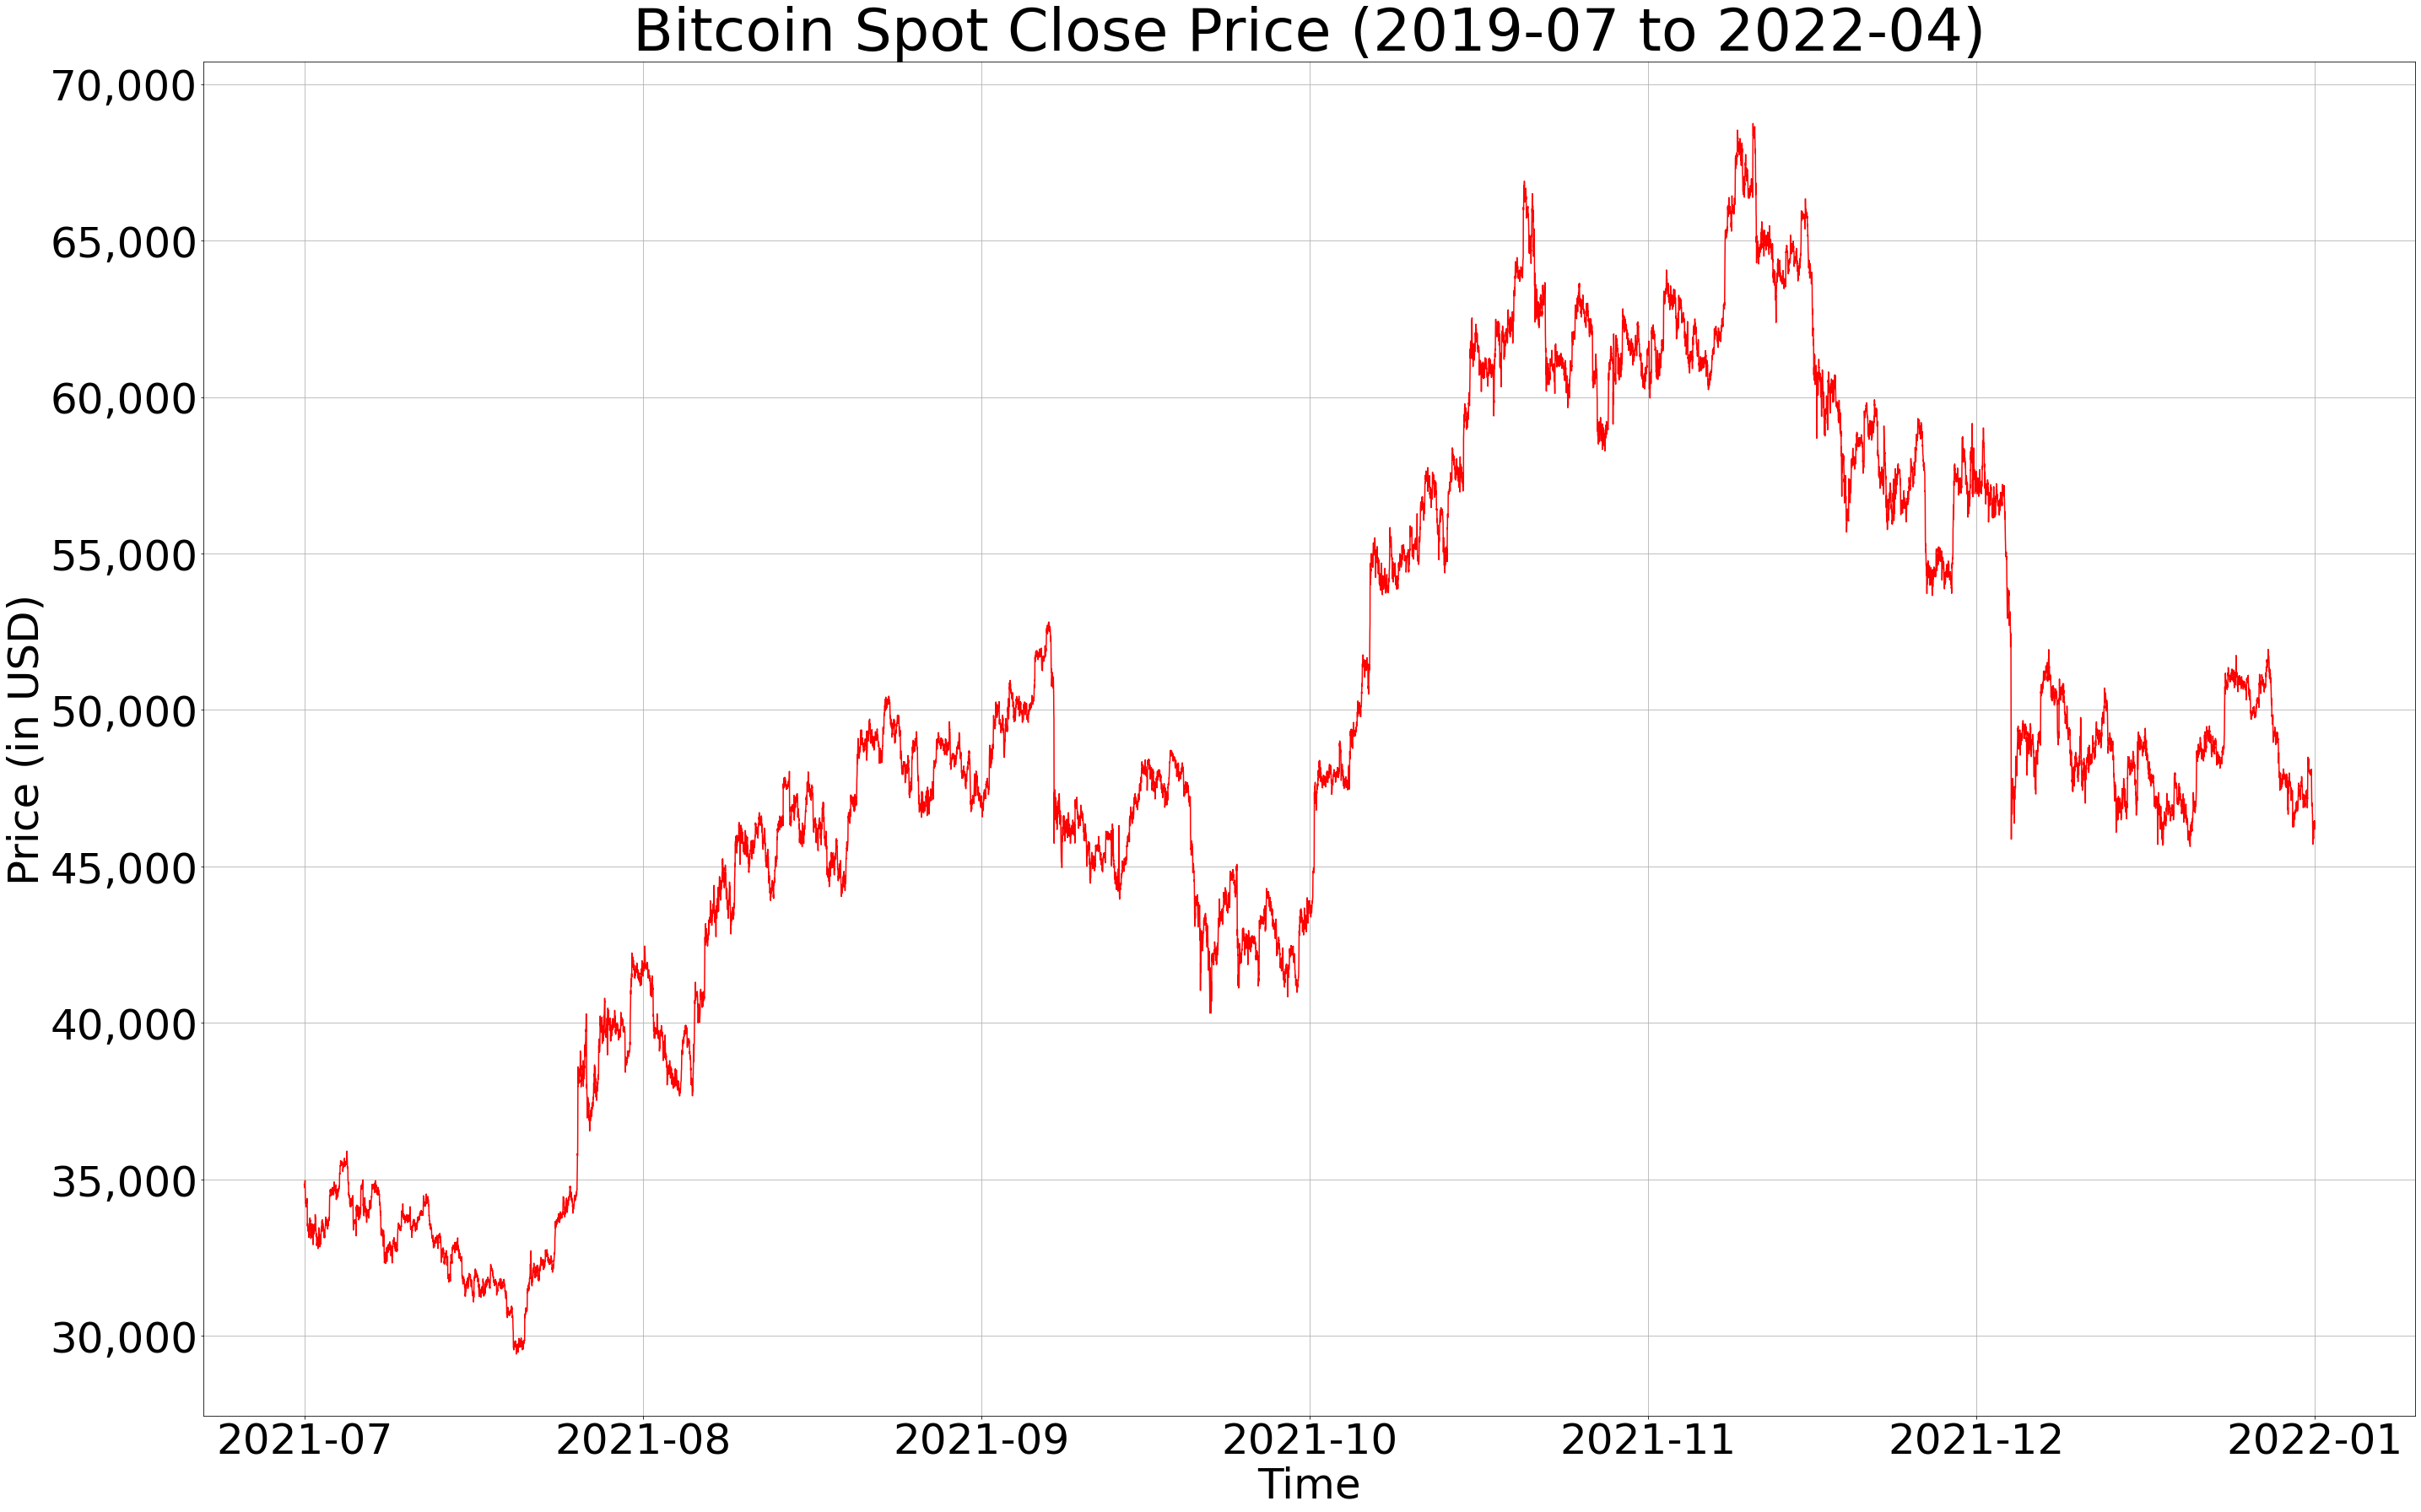

In [18]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (40,25)

ax.plot(main['Spot Close'], color='red')
ax.set_xlabel('Time', fontsize=50)
ax.set_ylabel('Price (in USD)', fontsize=50)
plt.title('Bitcoin Spot Close Price (2021-07 to 2021-12)', fontsize=70)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.grid(True)
ax.tick_params(axis='both', which='major', labelsize=50)

plt.tight_layout()
plt.savefig('/Users/robinvandenberg/Desktop/Thesis/Scripts/Figures/Prices1.pdf') 
plt.show()

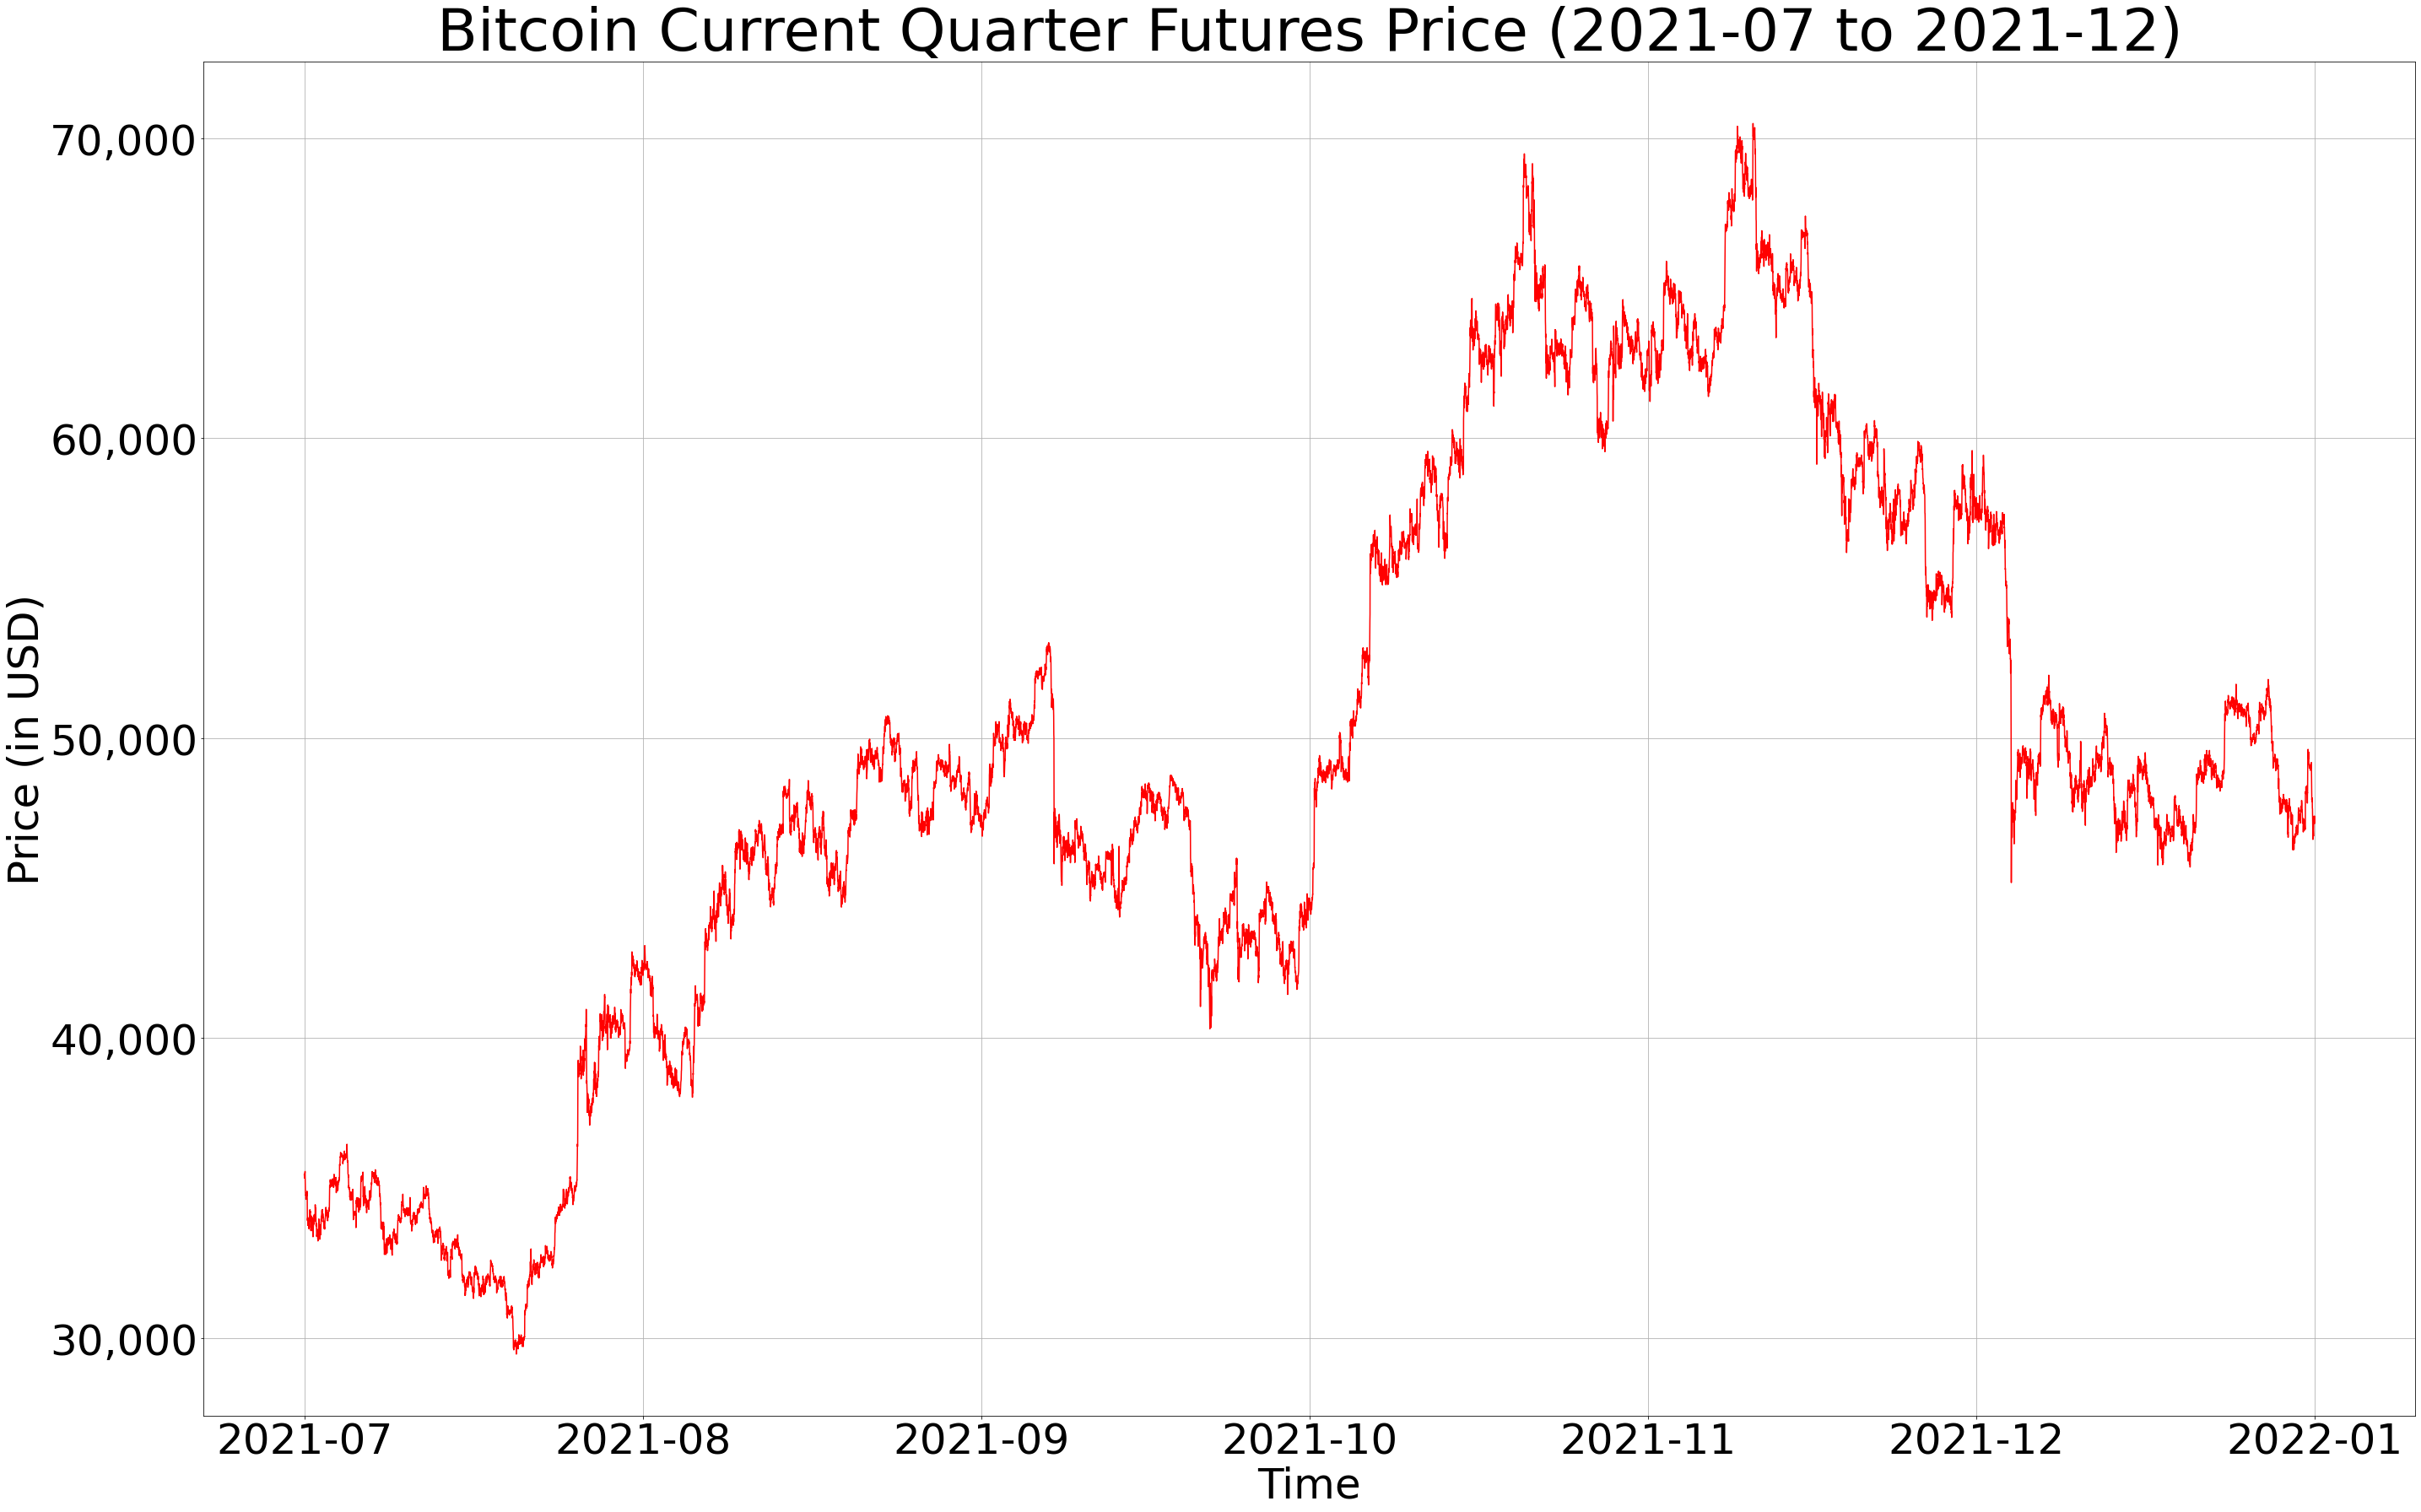

In [19]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (40,25)

ax.plot(main['CQF Close'], color='red')
ax.set_xlabel('Time', fontsize=50)
ax.set_ylabel('Price (in USD)', fontsize=50)
plt.title('Bitcoin Current Quarter Futures Price (2021-07 to 2021-12)', fontsize=70)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.grid(True)
ax.tick_params(axis='both', which='major', labelsize=50)

plt.tight_layout()
plt.savefig('/Users/robinvandenberg/Desktop/Thesis/Scripts/Figures/Prices2.pdf')
plt.show()

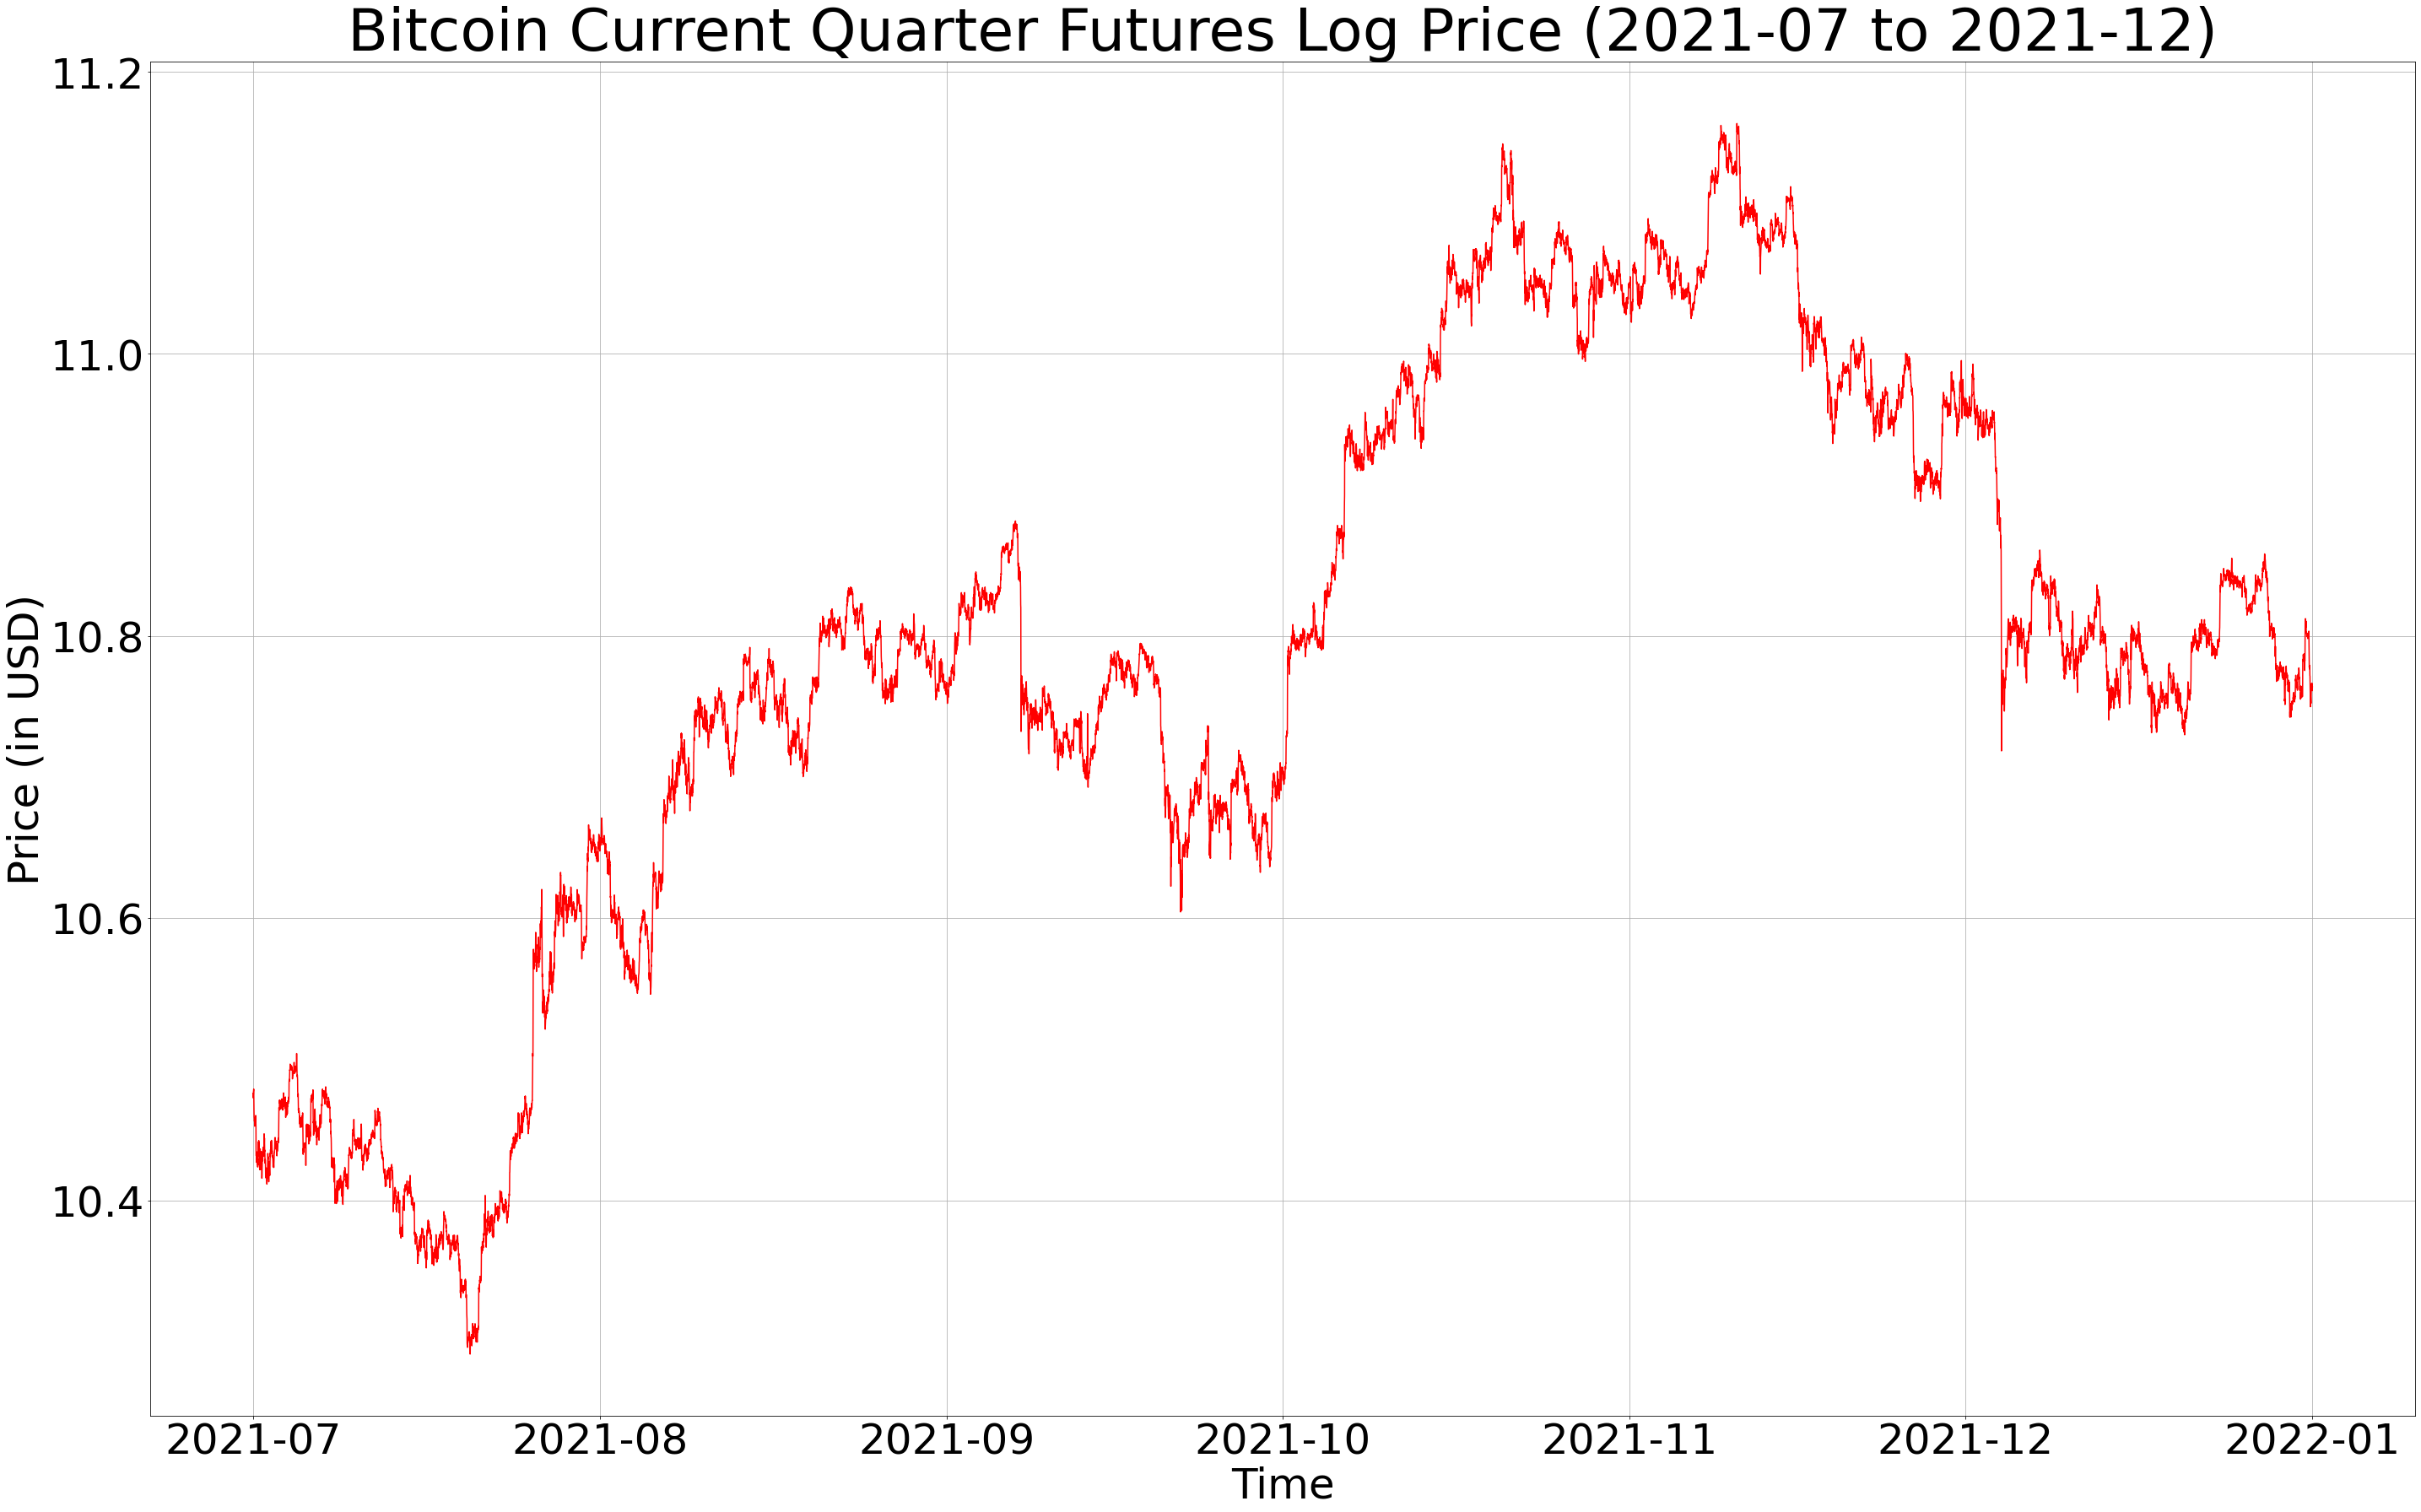

In [29]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (40,25)

ax.plot(main['log_price'], color='red')
ax.set_xlabel('Time', fontsize=50)
ax.set_ylabel('Price (in USD)', fontsize=50)
plt.title('Bitcoin Current Quarter Futures Log Price (2021-07 to 2021-12)', fontsize=70)
#ax.ticklabel_format(axis='y',style='plain')
#plt.ylim(ymin = 0, ymax = 1.1 * max(main['log_price']))
ax.grid(True)
ax.tick_params(axis='both', which='major', labelsize=50)

plt.tight_layout()
plt.savefig('/Users/robinvandenberg/Desktop/Thesis/Scripts/Figures/LogPrices.pdf')
plt.show()

# Log Prices

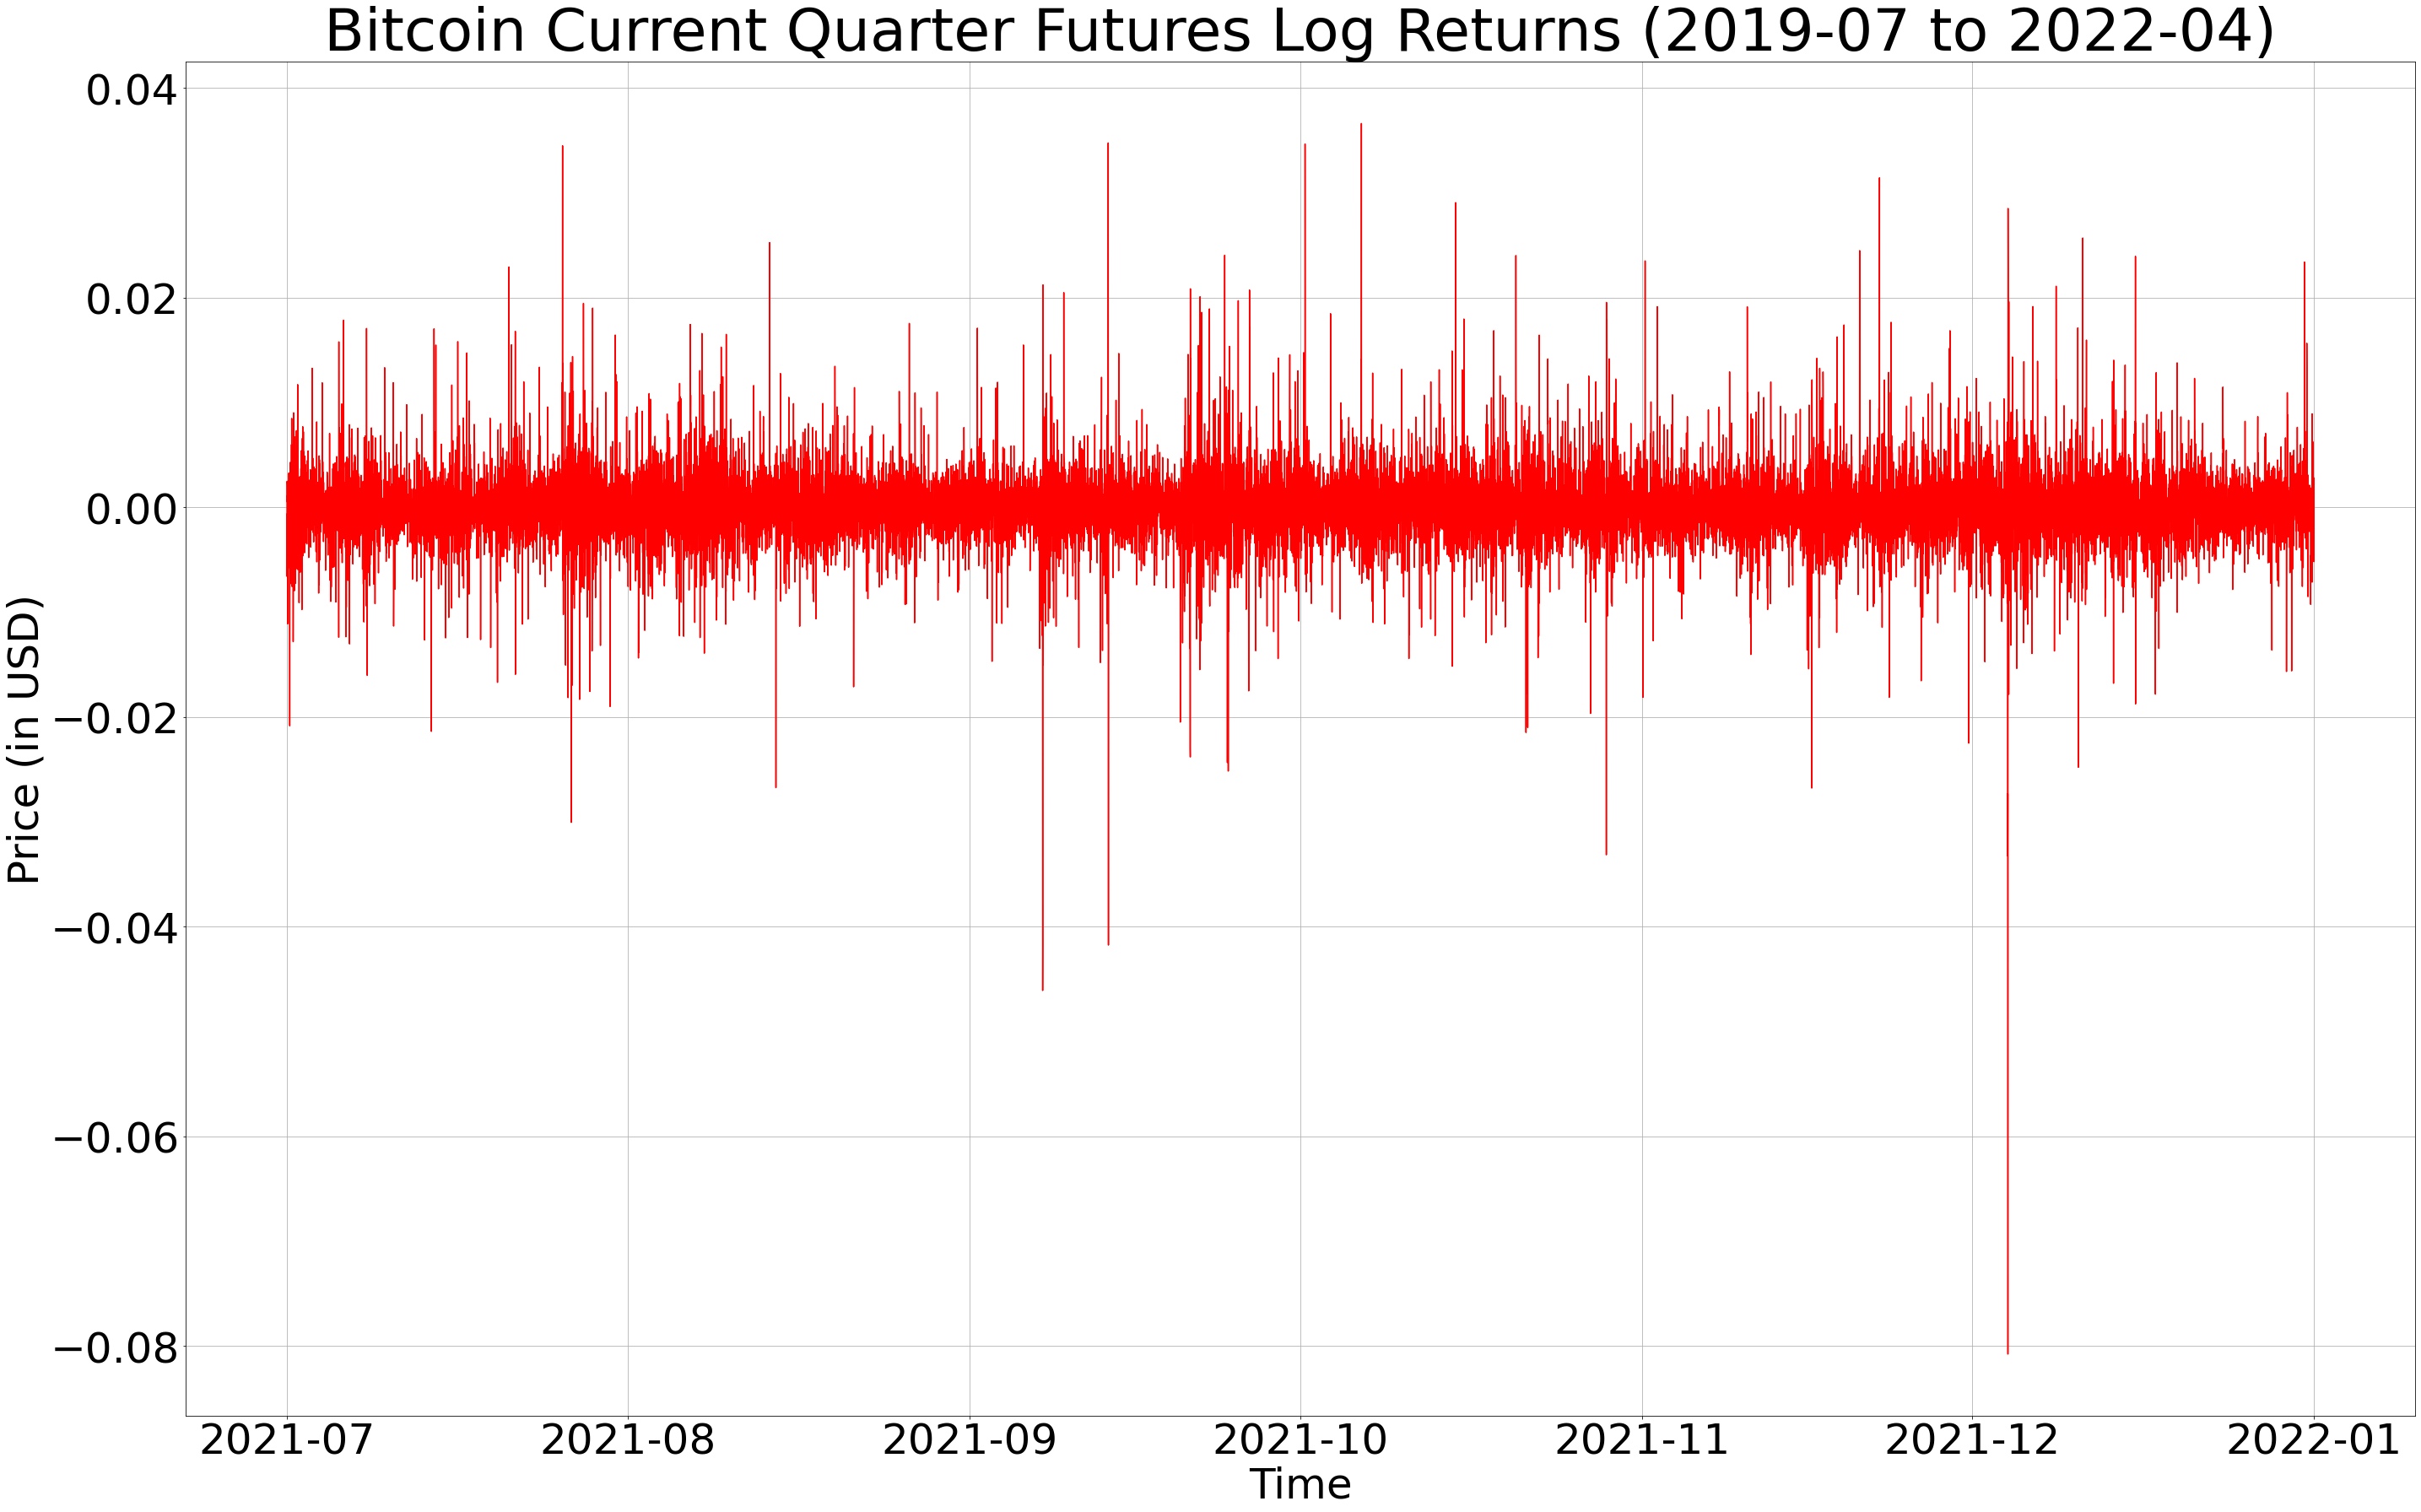

In [28]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (40,25)

ax.plot(main['returns'], color='red')
ax.set_xlabel('Time', fontsize=50)
ax.set_ylabel('Price (in USD)', fontsize=50)
plt.title('Bitcoin Current Quarter Futures Log Returns (2019-07 to 2022-04)', fontsize=70)
#ax.ticklabel_format(axis='y',style='plain')
#plt.ylim(ymin = 0, ymax = 1.1 * max(max(main['Spot Volume']), max(main['CQF Volume'])))
ax.grid(True)
ax.tick_params(axis='both', which='major', labelsize=50)

plt.tight_layout()
plt.savefig('/Users/robinvandenberg/Desktop/Thesis/Scripts/Figures/Returns.pdf')
plt.show()

# Volume

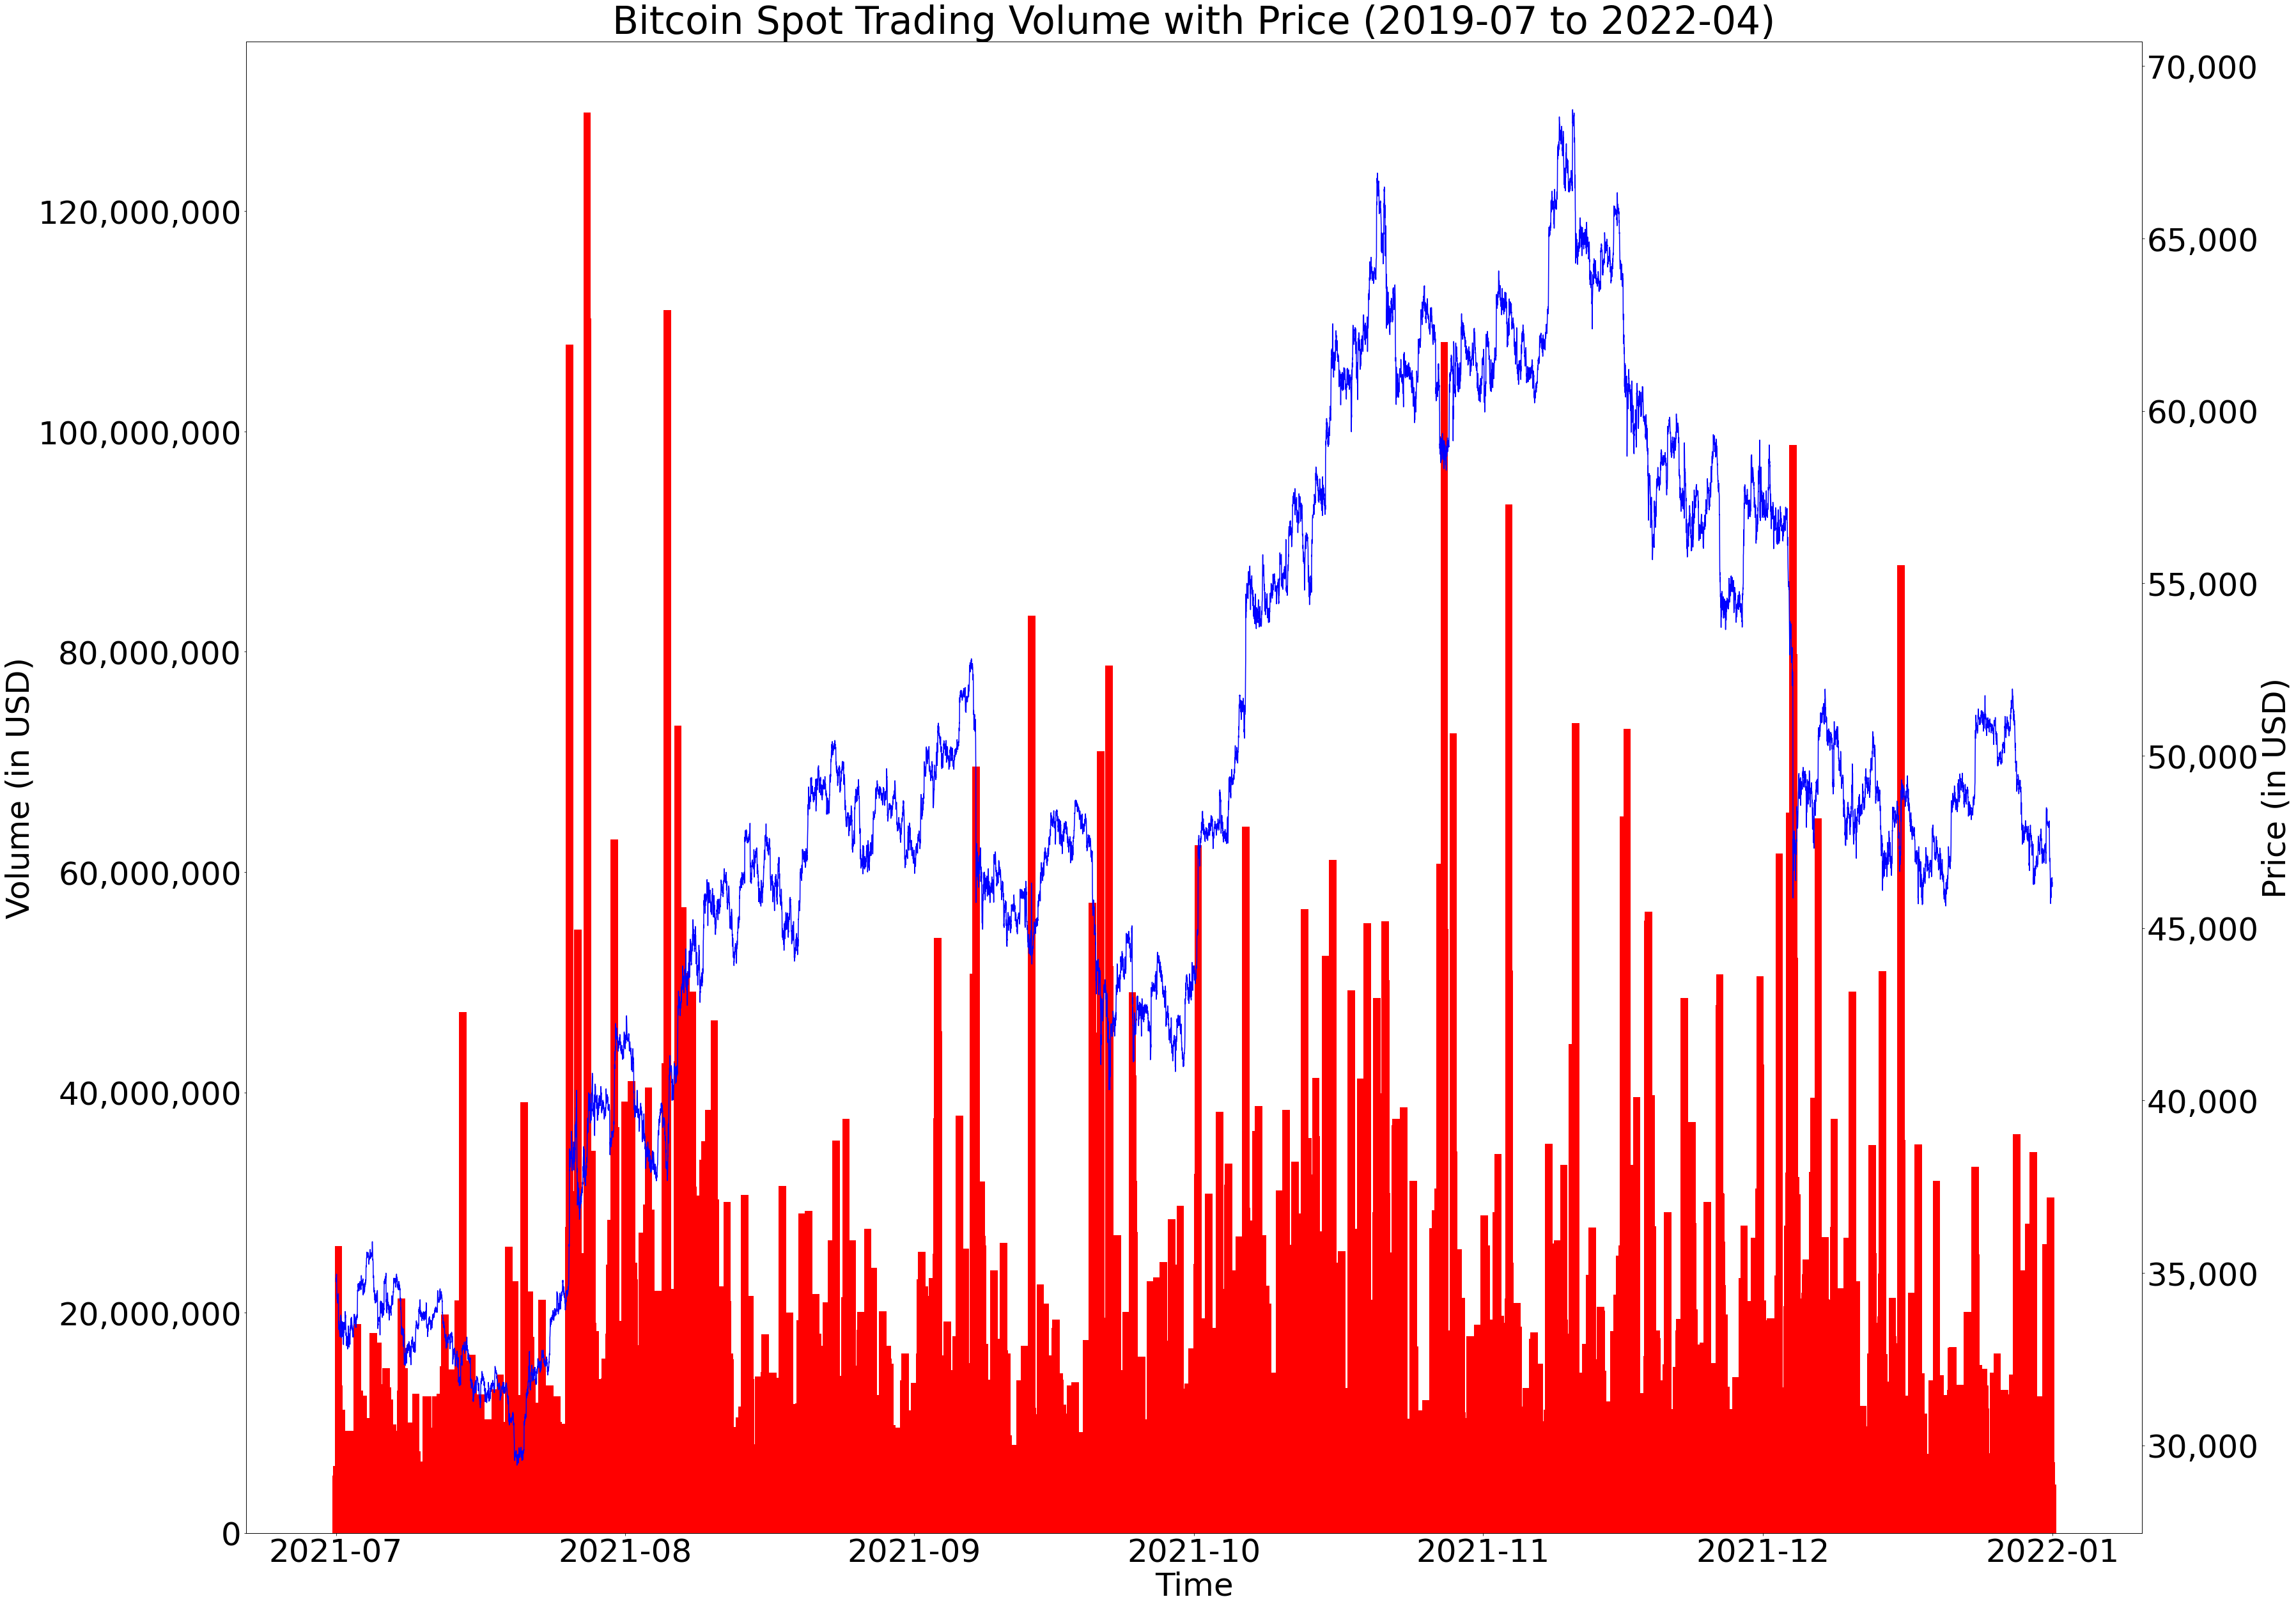

In [38]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (50,35)

ax.bar(main['time'], main['Spot Volume'], color='red')
ax.set_xlabel('Time', fontsize=50)
ax.set_ylabel('Volume (in USD)', fontsize=50)
plt.title('Bitcoin Spot Trading Volume with Price (2019-07 to 2022-04)', fontsize=60)
#ax.ticklabel_format(axis='y',style='plain')
#plt.ylim(ymin = 0, ymax = 1.1 * max(max(main['Spot Volume']), max(main['CQF Volume'])))
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.grid(False)
ax.tick_params(axis='both', which='major', labelsize=50)

ax2 = ax.twinx()
ax2.plot(main['time'], main['Spot Close'], color='blue')
ax2.set_ylabel('Price (in USD)', fontsize=50)
#ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax.get_yticks())))
ax2.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.grid(False)
ax2.tick_params(axis='both', which='major', labelsize=50)

plt.tight_layout()
plt.savefig('/Users/robinvandenberg/Desktop/Thesis/Scripts/Figures/Volumes1.pdf')
plt.show()

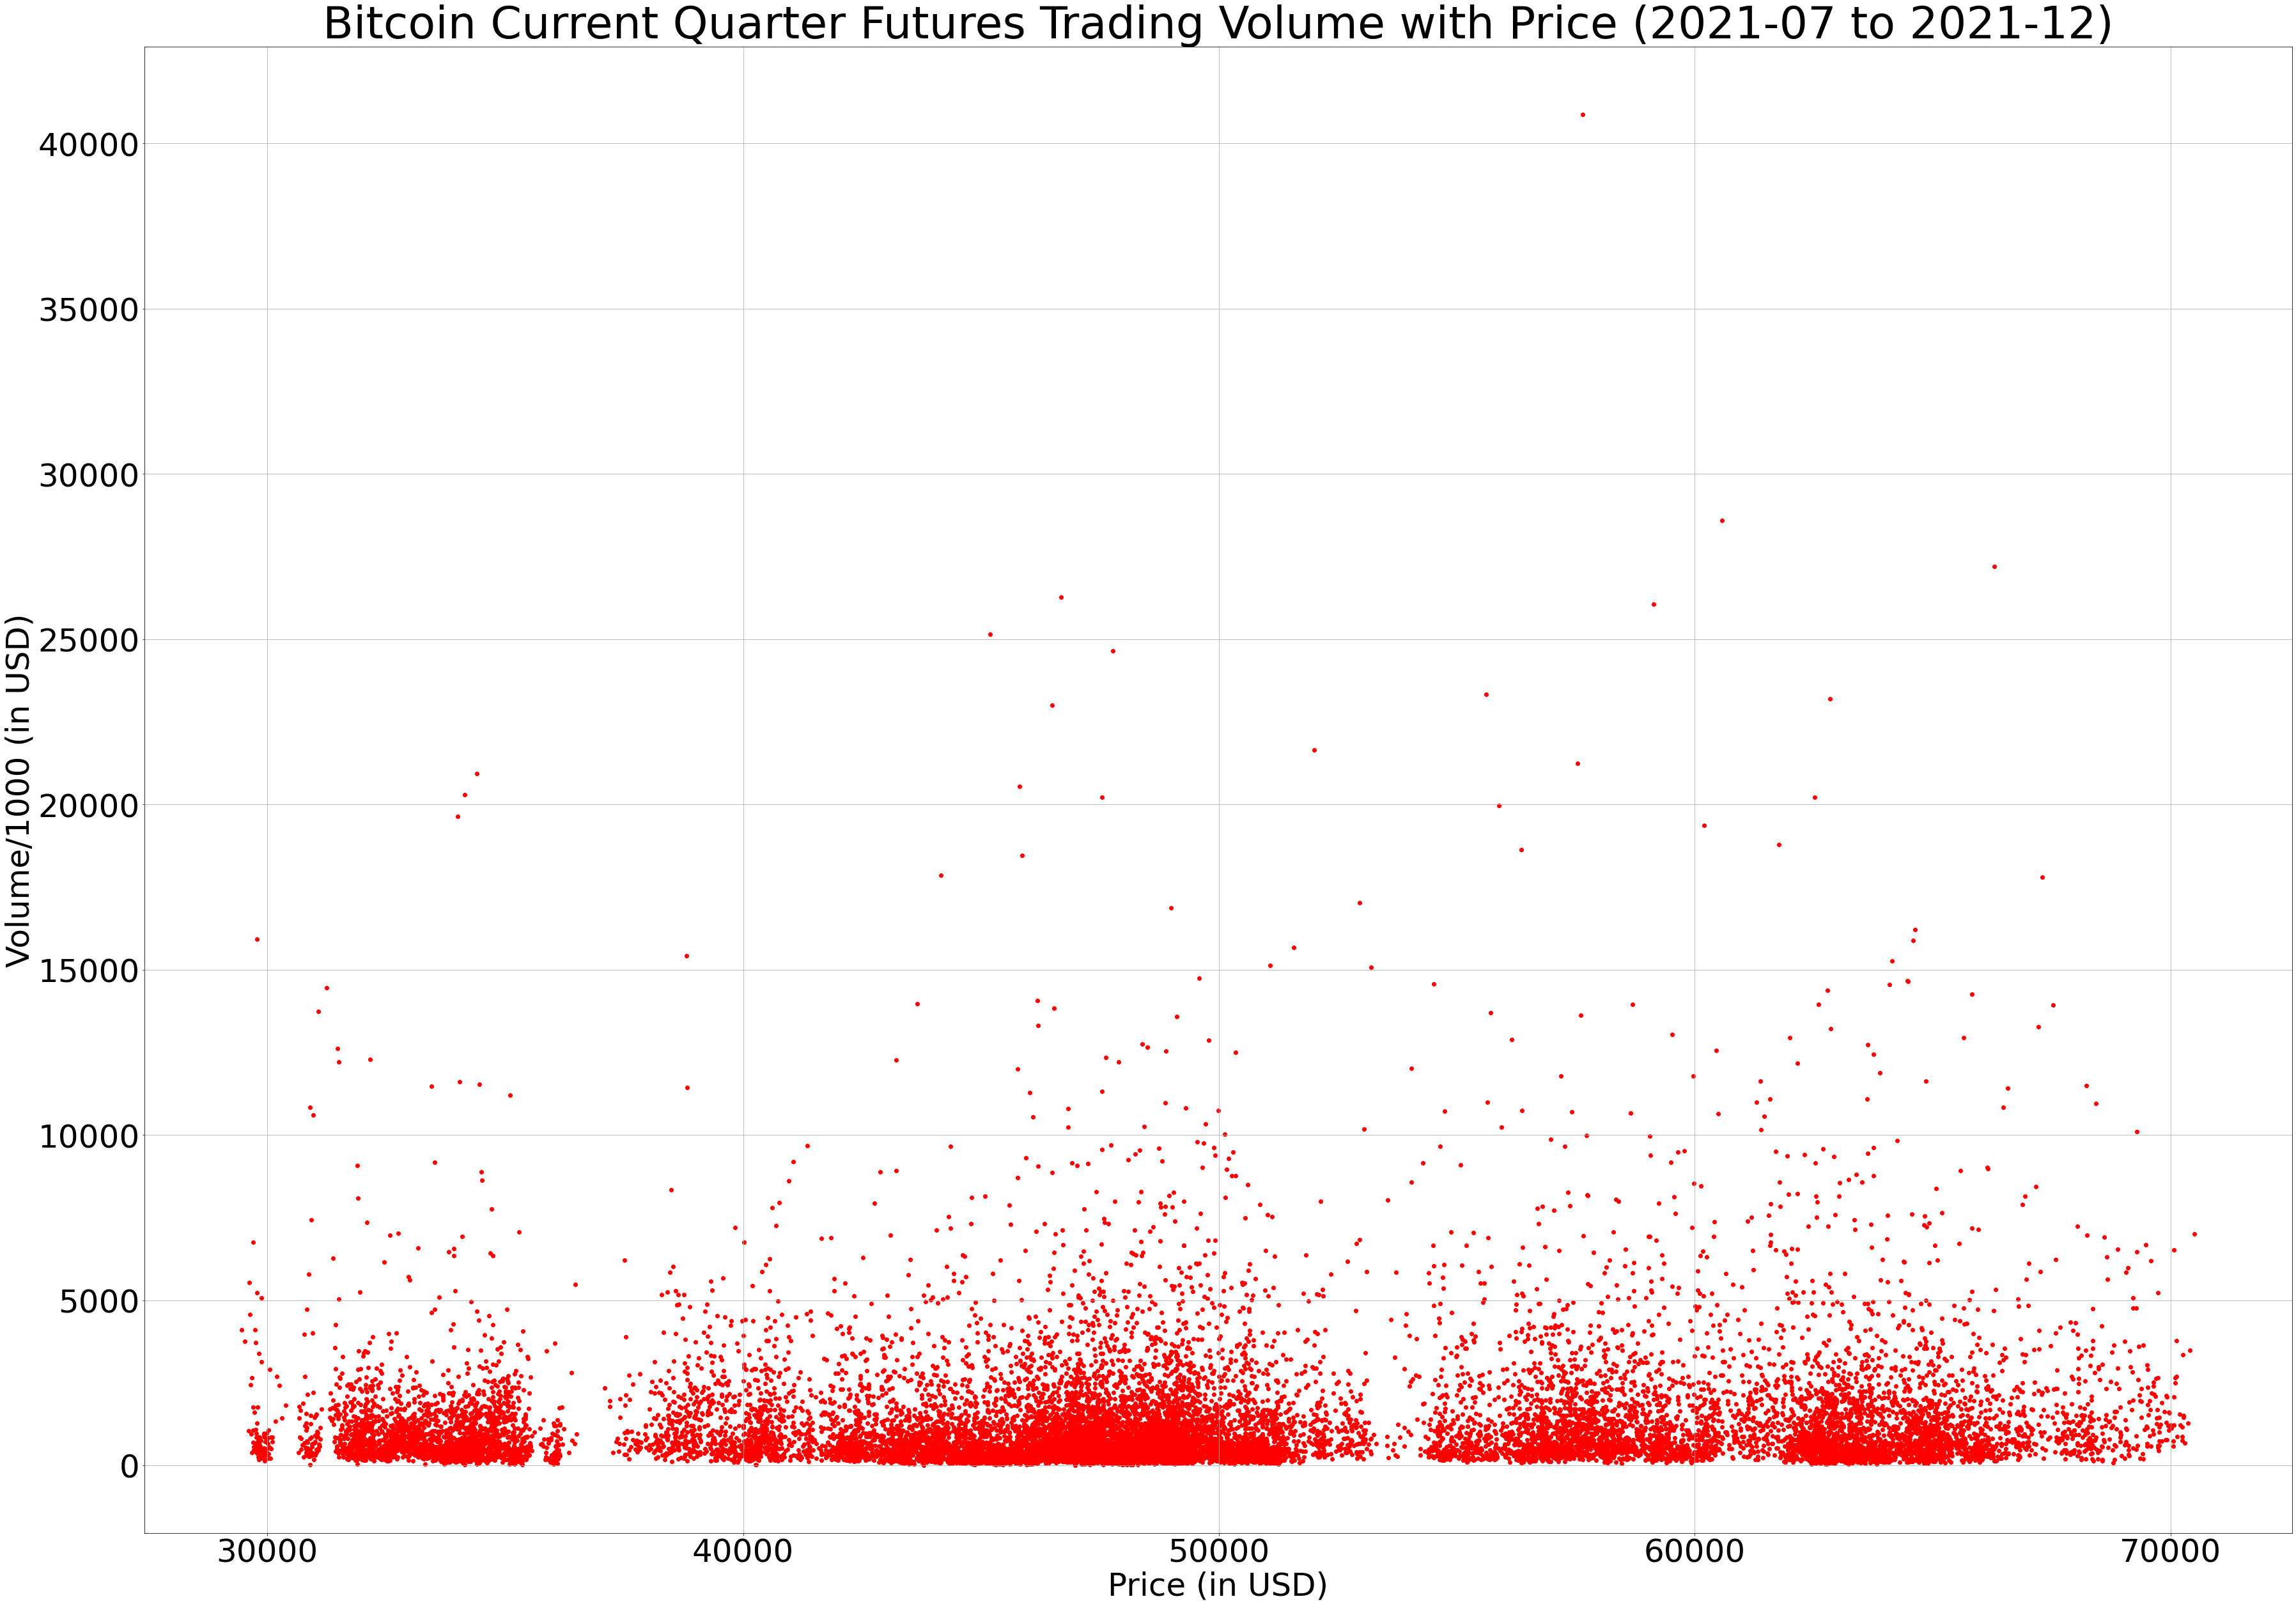

In [91]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (50,35)

plt.scatter(main['CQF Close'], main['CQF Volume']/1000, color='red') #Δ 
ax.set_xlabel('Price (in USD)', fontsize=50)
ax.set_ylabel('Volume/1000 (in USD)', fontsize=50)
plt.title('Bitcoin Current Quarter Futures Trading Volume with Price (2021-07 to 2021-12)', fontsize=70)
ax.grid(True)
#plt.ylim(ymin = -5, ymax=5)
ax.tick_params(axis='both', which='major', labelsize=50)
plt.tight_layout()
plt.savefig('/Users/robinvandenberg/Desktop/Desktop – Robin’s MacBook Pro/Thesis/Scripts/Figures/Volumes2.pdf')
plt.show()